## Importing Data Files

### Step 1 Adding the Pandas and Pyplot Dependencies

In [36]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

### Step 2 Loading a File into a Pandas DataFrame

In [ ]:
# File to Load 
student_data_to_load = "../data/students_complete.csv"

In [29]:
# Read the student data file and store it in a pandas DataFrame.
student_data_df = pd.read_csv(student_data_to_load)
student_data_df.head()

Student ID       student_name gender grade        school_name  \
0           0       Paul Bradley      M   9th  Huang High School   
1           1       Victor Smith      M  12th  Huang High School   
2           2    Kevin Rodriguez      M  12th  Huang High School   
3           3  Dr. Richard Scott      M  12th  Huang High School   
4           4         Bonnie Ray      F   9th  Huang High School   

   reading_score  math_score  
0             66          79  
1             94          61  
2             90          60  
3             67          58  
4             97          84

## Cleaning Student Names

## Cleaning Data

### Step 1 Finding Missing Values

In [ ]:
# Determine if there are any missing values in the student data by counting the number of entries in each column. 
student_data_df.count()

In [ ]:
# Determine if there are any missing values in the student data. 
student_data_df.isnull().sum()

### Step 2 Determining Data Types

In [28]:
# Determine data types for the student DataFrame. 
student_data_df.dtypes

Student ID        int64
student_name     object
gender           object
grade            object
school_name      object
reading_score     int64
math_score        int64
grade_num         int64
dtype: object

### Step 3 Cleaning Student Names

### It seems that one and maybe more students thought it might be funny to add the prefix "Dr."  to their name when filling out their personal information. Let's check all the student names to see if there are any more surprises. 

In [44]:
# Put the student names in a list. 
student_names = student_data_df["student_name"]\
.to_list()

student_names

['Paul Bradley',
 'Victor Smith',
 'Kevin Rodriguez',
 'Dr. Richard Scott',
 'Bonnie Ray',
 'Bryan Miranda',
 'Sheena Carter',
 'Nicole Baker',
 'Michael Roth',
 'Matthew Greene',
 'Andrew Alexander',
 'Daniel Cooper',
 'Brittney Walker',
 'William Long',
 'Tammy Hebert',
 'Dr. Jordan Carson',
 'Donald Zamora',
 'Kimberly Santiago',
 'Kevin Stevens',
 'Brandi Lyons',
 'Lisa Davis',
 'Kristen Lopez',
 'Kimberly Stewart',
 'Christopher Parker',
 'Chelsea Griffith',
 'Cesar Morris',
 'Melanie Decker',
 'Tracey Oconnor',
 'Kelly James',
 'Nicole Brown',
 'Bobby Harris',
 'Brian Fernandez',
 'Candace Phelps',
 'Amy Gonzalez',
 'Steven Green',
 'Benjamin Carlson',
 'Kevin Bailey',
 'Jesse Newton',
 'Kimberly Mercado',
 'Gregory Roberts',
 'Matthew Mayer',
 'Jennifer Parks',
 'John Carlson',
 'Megan Roberts',
 'Debra Flores',
 'Heidi Jackson',
 'Denise Bradford',
 'Ellen Brown',
 'Amy Perkins',
 'Natalie Mitchell',
 'Tiffany Gutierrez',
 'Jennifer Hess',
 'Christine Fletcher',
 'Jon Smith',
 

### It looks like there are many prefixes and some suffixes that were added to the student names. Lets see how many students are affected.  

In [42]:
# Create a new list and use it for the for loop to iterate through the list.
students_to_fix = []

# Then use an if statement to check the length of the name. 
# If the name is greater than or equal to "3", then add the name to the list.

for name in student_names:
if len(name.split()) >= 3:
        students_to_fix.append(name)

# Get the length of the students whose names are greater than or equal to "3".
len(students_to_fix)

IndentationError: expected an indented block (<ipython-input-42-a645e405cf4b>, line 8)

### That's a lot of students. It seems we wil have to remove those prefixes and suffixes. To find out what prefixes and suffixes to remove let's print out the list.

In [30]:
print(students_to_fix)

['Dr. Richard Scott', 'Dr. Jordan Carson', 'Madeline Snyder MD', 'Mr. Dylan Taylor MD', 'Dr. Scott Gill', 'Miss Madison Everett', 'Virginia Ramirez MD', 'Joseph Morales III', 'Angela Perkins DVM', 'Heather Allen MD', 'Luke Lowery MD', 'Dr. Larry Hines', 'Emily Cardenas MD', 'Mrs. Elizabeth Espinoza DDS', 'Mrs. Lisa Becker', 'Mr. Travis Young', 'Paula Fernandez DVM', 'Dr. Xavier Bell II', 'Andrew Hanson MD', 'Mr. Roberto Wright MD', 'Mr. Dale Miller', 'Mary Gonzalez DDS', 'Mrs. Cindy Brown', 'James White MD', 'Donald Gill DDS', 'Mrs. Catherine Williams MD', 'Ashley Caldwell MD', 'Mr. Jared Campbell', 'Michael Moreno PhD', 'Tara Parker MD', 'Shawn Williams DVM', 'Dr. Alicia Martinez', 'Mr. Timothy Anderson', 'Mrs. Paula Lee', 'Mr. Elijah Hall', 'Mr. Raymond Stone', 'John Dickerson MD', 'Mr. Alex Franklin', 'Mrs. Jessica Dunn', 'Mr. Michael Stevenson', 'Jason Jones DDS', 'Adriana Wade MD', 'Erica Hurley MD', 'Dr. Garrett Wright', 'Mr. James Allen', 'Mr. Timothy Harper MD', 'Dale Brown MD'

### The prefixes we should remove are "Dr.", "Mr.","Ms." ,"Mrs.", "Miss". And, the suffixes we should remove are "MD", "DDS", "DVM", "PhD". The Jr., II, III, IV, and V after a student name are valid, so we will keep those. While we're at it we'll remove the "th" following grade in order to use it as a numeric column.

### Step 4 Replace Substrings in a Python String

In [ ]:
# Add each prefix and suffix to remove to a list.  
prefixes_suffixes = ["Dr. ", "Mr. ","Ms. ", "Mrs. ", "Miss ", " MD", " DDS", " DVM", " PhD"]

number_th = "th"

In [ ]:
# Iterate through the words in the "prefixes_suffixes" list and replace them with an empty space, "". 
for word in prefixes_suffixes:
    student_data_df["student_name"] = student_data_df["student_name"].str.replace(word,"")
    
#replace any instance of number_th with an empty space and create a new column
student_data_df["grade_num"]=pd.to_numeric(student_data_df["grade"].str.replace(number_th, ""))

In [ ]:
#  Check the student_data DataFrame
student_data_df

In [ ]:
#  Once again, check the students names that equal to or greater than "3".
# Put the student names in a list.
student_names = student_data_df["student_name"].to_list()
student_names

In [ ]:
# Create a new list and use it for the for loop to iterate through the list.
students_fixed = []

# Then use an if statement to check the length of the name. 
# If the name is greater than or equal to "3", then add the name to the list.

for name in student_names:
    if len(name.split()) >= 3:
        students_fixed.append(name)

# Get the length of the students whose names are greater than or equal to "3".
len(students_fixed)

In [ ]:
print(students_fixed)

### That looks better! Now, only the names with suffixes related to the familial generations will be kept. 

### Let's make a few visualizations using the cleaned data after seeing what types of columns we have

In [ ]:
student_data_df.dtypes

(array([ 751.,  738.,  758.,  743.,  714.,  746., 1110., 1110., 1073.,
        1120., 1112., 1106., 1149., 1087., 1178., 1078., 1116., 1150.,
        1121., 1162., 1176., 1166., 1128., 1113., 1161., 1125., 1095.,
        1105., 1076., 1197., 1110., 1114., 1126., 1089., 1026., 2241.]),
 array([63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75.,
        76., 77., 78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88.,
        89., 90., 91., 92., 93., 94., 95., 96., 97., 98., 99.]),
 <BarContainer object of 36 artists>)

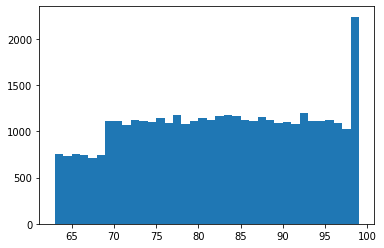

In [31]:
#create a histogram of reading scores using matplotlib
plt.hist(student_data_df['reading_score'], bins=36)

In [32]:
#the very useful describe function which provides aggregate statistics for all numeric columns in the dataset
student_data_df.describe()

Student ID  reading_score    math_score
count  39170.000000    39170.00000  39170.000000
mean   19584.500000       81.87784     78.985371
std    11307.549359       10.23958     12.309968
min        0.000000       63.00000     55.000000
25%     9792.250000       73.00000     69.000000
50%    19584.500000       82.00000     79.000000
75%    29376.750000       91.00000     89.000000
max    39169.000000       99.00000     99.000000

### plot a simple line plot then linear regression using seaborn, another popular Python visualization library

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

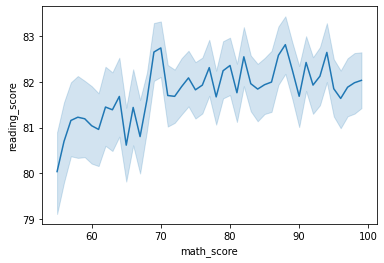

In [40]:
sns.lineplot(x=student_data_df.math_score, y=student_data_df.reading_score, data=student_data_df)

In [39]:
gradient, intercept, r_value, p_value, std_err = stats.linregress(student_data_df.reading_score,student_data_df.math_score)
print ("Gradient and intercept", gradient, intercept)

Gradient and intercept 0.0365888009489813 75.9895594611302


<AxesSubplot:xlabel='reading_score', ylabel='math_score'>

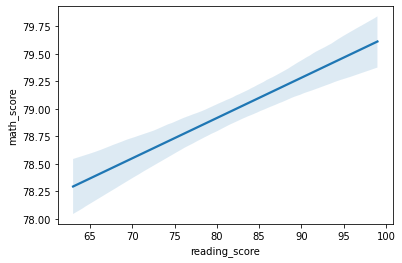

In [38]:
sns.regplot(x="reading_score", y="math_score", data=student_data_df, fit_reg=True, scatter=False)

In [ ]:
sns.lineplot(x=student_data_df.grade_num, y=student_data_df.reading_score, data=student_data_df)

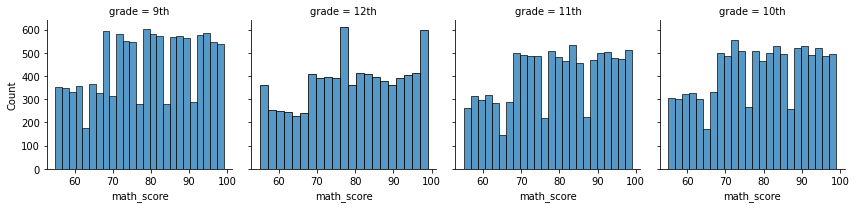

In [33]:
g = sns.FacetGrid(student_data_df, col="grade")
g.map(sns.histplot, "math_score")